In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
image_folder = os.environ['image_folder']
save_figs = os.environ['save_figs']

# Scrap book

This ipynb, is for all the wierd fiddly bits you need to have. It is not in marimo as it probably contains many unrelated bits that could take a while to run.

This is annoying but, it is life

## Making Ground truth

Because there are so many bounding boxes in the NCSE test set I am using the response from pixtral to create the initial GT text files. I can then replace the text in them with the actual GT from the transcriptions. This should make it faster as I can read what is in there.


In [5]:


pixtral_ncse_test_response_path = 'data/download_jobs/experiments/dataframe/NCSE_deskew_True_max_ratio_1.csv'

pixtral_response_df = pd.read_csv(pixtral_ncse_test_response_path)

bbox_transcripts_path = 'data/transcripts/bbox_pixtral'

os.makedirs(bbox_transcripts_path, exist_ok=True)

for index, row in pixtral_response_df.iterrows():
    with open(os.path.join(bbox_transcripts_path , row['filename']), 'w') as file:  # 'w' for text mode
        file.write(row['content'])


bbox_transcripts_path = 'data/model_performance/NCSE_pixtral'

os.makedirs(bbox_transcripts_path, exist_ok=True)
# Rename the files so that it harmonsies with the other file names.. it is annnouying this has to be to done but is not important enough to fix
pixtral_response_df['filename'] = pixtral_response_df['filename'].str.replace("_box_page_id", "")
for index, row in pixtral_response_df.iterrows():
    with open(os.path.join(bbox_transcripts_path , row['filename']), 'w') as file:  # 'w' for text mode
        file.write(row['content'])

In [17]:


pixtral_BLN_test_response_path = 'data/download_jobs/experiments/dataframe/BLN600_deskew_True_max_ratio_1.csv'

pixtral_response_df = pd.read_csv(pixtral_BLN_test_response_path)

bbox_transcripts_path = 'data/model_performance/BLN_pixtral'

os.makedirs(bbox_transcripts_path, exist_ok=True)
# Rename the files so that it harmonsies with the other file names.. it is annnouying this has to be to done but is not important enough to fix
pixtral_response_df['filename'] = pixtral_response_df['issue_id'].astype(str) + '.txt'
for index, row in pixtral_response_df.iterrows():
    with open(os.path.join(bbox_transcripts_path , row['filename']), 'w') as file:  # 'w' for text mode
        file.write(row['content'])

In [15]:
pixtral_response_df

,issue_id,page_number,block,column,reading_order,content,segment_count,prompt_tokens,completion_tokens,total_tokens,box_page_id,page_id,filename
0,3200797029,1,0,1,0,OR SEVEN DAYS.\n\nROBBERY AT A BARONET'S.\n\nE...,2,5390,610,6000,B0C1R0,3200797029_page_1,3200797029_page_1_box_page_id_B0C1R0.txt
1,3200797032,1,0,1,0,CHARGE OF SETTING FIRE TO A HOUSE.\n\nAt the T...,2,5186,628,5814,B0C1R0,3200797032_page_1,3200797032_page_1_box_page_id_B0C1R0.txt
2,3200797034,1,0,1,0,SERVANTS AND THEIR SWEETHEARTS.\n\nOn Saturday...,3,8397,899,9296,B0C1R0,3200797034_page_1,3200797034_page_1_box_page_id_B0C1R0.txt
3,3200797037,1,0,1,0,CAPTURE OF PICKPOCKETS.\n\nAt Stratford petty ...,3,7185,808,7993,B0C1R0,3200797037_page_1,3200797037_page_1_box_page_id_B0C1R0.txt
4,3200801612,1,0,1,0,DOUBLE MURDER BY A MOTHER AT RUSHOLME.\n\n[SUB...,5,14525,1427,15952,B0C1R0,3200801612_page_1,3200801612_page_1_box_page_id_B0C1R0.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3207643520,1,0,1,0,```\nLAW NOTICES.—This Day.\n\nCOURT OF CHANCE...,2,6246,920,7166,B0C1R0,3207643520_page_1,3207643520_page_1_box_page_id_B0C1R0.txt
596,3207644658,1,0,1,0,SOUTH DEVON ELECTION.\n\nTo the EDITOR of the ...,3,8397,834,9231,B0C1R0,3207644658_page_1,3207644658_page_1_box_page_id_B0C1R0.txt
597,3207644853,1,0,1,0,```\nMIRROR OF FASHION.\n\n[FROM THE COURT CIR...,3,8397,840,9237,B0C1R0,3207644853_page_1,3207644853_page_1_box_page_id_B0C1R0.txt
598,3207646187,1,0,1,0,LONDON MARKETS.—MONDAY.\n\nCORN EXCHANGE.\n\nT...,1,2695,162,2857,B0C1R0,3207646187_page_1,3207646187_page_1_box_page_id_B0C1R0.txt


## Chronicalling Germany 

This provides a quick look at the Chroncialling Germany dataset. It could be added as a curve ball dataextraction if needed. The use of fraktur font and and German will result in higher errors which are a good way to introduce fine-tuning. However, it is a bunch more work so I am not super stoked by the idea. The data should also probably be pre-proscess to make it smaller as it is currently 4.5 gb for 400 pages.









In [27]:
import xml.etree.ElementTree as ET

def parse_coords(points_str):
    """Convert points string to list of coordinates"""
    points = points_str.strip().split()
    coords = []
    for point in points:
        x, y = point.split(',')
        coords.append((int(x), int(y)))
    return coords

def get_bounding_box(coords):
    """Calculate bounding box (min_x, min_y, max_x, max_y) from coordinates"""
    x_coords = [x for x, y in coords]
    y_coords = [y for x, y in coords]
    return {
        'x1': min(x_coords),
        'y1': min(y_coords),
        'x2': max(x_coords),
        'y2': max(y_coords)
    }

def extract_text_and_boxes(xml_string):
    # Parse XML
    root = ET.fromstring(xml_string)
    
    # Define namespace
    namespace = {'ns': 'http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15'}
    
    # Dictionary to store all document information
    document_info = {
        'regions': {},
        'metadata': {
            'n_regions': 0,
            'region_types': set()
        }
    }
    
    # Find all TextRegion elements
    for region in root.findall('.//ns:TextRegion', namespace):
        region_id = region.get('id', 'unknown')
        
        # Get region type and custom attributes
        region_type = region.get('type', 'unknown')
        custom_attr = region.get('custom', '')
        
        # Extract reading order index
        reading_order = None
        if 'readingOrder {index:' in custom_attr:
            try:
                reading_order = int(custom_attr.split('readingOrder {index:')[1].split('}')[0])
            except:
                reading_order = 999
        
        # Get coordinates
        coords_elem = region.find('.//ns:Coords', namespace)
        if coords_elem is not None:
            points = coords_elem.get('points')
            coords = parse_coords(points)
            bbox = get_bounding_box(coords)
        else:
            bbox = None
        
        # Get text from all lines in region
        region_text = []
        for text_line in region.findall('.//ns:TextLine', namespace):
            unicode_elem = text_line.find('.//ns:Unicode', namespace)
            if unicode_elem is not None and unicode_elem.text:
                region_text.append(unicode_elem.text.strip())
        
        # Store region information
        document_info['regions'][region_id] = {
            'reading_order': reading_order,
            'type': region_type,
            'bbox': bbox,
            'text': '\n'.join(region_text),
            'raw_coords': coords if coords_elem is not None else None
        }
        
        # Update metadata
        document_info['metadata']['region_types'].add(region_type)
    
    # Update final metadata
    document_info['metadata']['n_regions'] = len(document_info['regions'])
    document_info['metadata']['region_types'] = list(document_info['metadata']['region_types'])
    
    return document_info


In [36]:

xml_file = "/home/jonno/ereading_the_unreadable/data/Berliner_Boersen_Zeitung_1857-04-06_0001.xml"

# Usage example:
with open(xml_file, 'r', encoding='utf-8') as file:
    xml_content = file.read()
    
doc_info = extract_text_and_boxes(xml_content)

# Example: Convert to DataFrame
import pandas as pd

def create_bbox_dataframe(doc_info):
    rows = []
    for region_id, region_data in doc_info['regions'].items():
        if region_data['bbox']:
            row = {
                'region_id': region_id,
                'type': region_data['type'],
                'reading_order': region_data['reading_order'],
                **region_data['bbox']  # Unpacks x1, y1, x2, y2
            }
            rows.append(row)
    return pd.DataFrame(rows)

# Create DataFrame of bounding boxes
bbox_df = create_bbox_dataframe(doc_info)

# Example usage:
print("\nDocument Metadata:")
print(doc_info['metadata'])

print("\nSample region data:")
sample_region_id = list(doc_info['regions'].keys())[0]
print(doc_info['regions'][sample_region_id])

print("\nBounding Box DataFrame:")
print(bbox_df.head())


Document Metadata:
{'n_regions': 18, 'region_types': ['heading', 'header', 'unknown', 'caption']}

Sample region data:
{'reading_order': 999, 'type': 'caption', 'bbox': {'x1': 165, 'y1': 209, 'x2': 797, 'y2': 901}, 'text': 'HrinInama\nd\nDieses Blatt erscheint ohne Anmnahme\ntäglich zweimal.\nAbonnemeuts-Prei-\nvierteljährl. für Berlin 2 Thlr 15Sgr.,\nfur gan Preussen 3 Thlr., für ganz\nDeutschland 3 Thlr. 15\nIusertious-Gebühr\ntar cte dreigespaltene Zeile 2gr.', 'raw_coords': [(172, 764), (165, 400), (213, 209), (739, 209), (787, 378), (776, 461), (772, 547), (797, 582), (789, 669), (763, 728), (787, 895), (178, 901)]}

Bounding Box DataFrame:
                  region_id     type  reading_order   x1    y1    x2    y2
0   region_1722350650121_61  caption            999  165   209   797   901
1  region_1722350869520_107  heading            999  177  1071  1138  1161
2  region_1722350991056_123  unknown            999  165  1147  1139  1566
3  region_1722350874930_110  heading         

In [38]:
doc_info['regions']

{'region_1722350650121_61': {'reading_order': 999,
  'type': 'caption',
  'bbox': {'x1': 165, 'y1': 209, 'x2': 797, 'y2': 901},
  'text': 'HrinInama\nd\nDieses Blatt erscheint ohne Anmnahme\ntäglich zweimal.\nAbonnemeuts-Prei-\nvierteljährl. für Berlin 2 Thlr 15Sgr.,\nfur gan Preussen 3 Thlr., für ganz\nDeutschland 3 Thlr. 15\nIusertious-Gebühr\ntar cte dreigespaltene Zeile 2gr.',
  'raw_coords': [(172, 764),
   (165, 400),
   (213, 209),
   (739, 209),
   (787, 378),
   (776, 461),
   (772, 547),
   (797, 582),
   (789, 669),
   (763, 728),
   (787, 895),
   (178, 901)]},
 'region_1722350869520_107': {'reading_order': 999,
  'type': 'heading',
  'bbox': {'x1': 177, 'y1': 1071, 'x2': 1138, 'y2': 1161},
  'text': 'GeneßehendHerGär.itg',
  'raw_coords': [(177, 1071),
   (1138, 1089),
   (1137, 1150),
   (1118, 1161),
   (1066, 1145),
   (461, 1135),
   (441, 1149),
   (425, 1135),
   (334, 1137),
   (307, 1150),
   (284, 1147),
   (268, 1136),
   (179, 1142)]},
 'region_1722350991056_123

# Merge vs No Merge in bbox processing


I want to see what the difference is between merged and non merged bounding boxes in the data sets

In [12]:

test = pd.read_parquet(os.path.join(image_folder,'converted/all_files_png_120/page_size_info.parquet'))

,name,width,height,type
0,English Womans Journal,238.367832,365.099277,Archive
1,Leader,364.201840,485.927474,Archive
2,Monthly Repository,330.688823,484.405931,Archive
3,Northern Star,508.448178,782.948024,Archive
4,Publishers Circular,343.112162,509.137257,Archive
5,Tomahawk,352.579810,383.132850,Archive


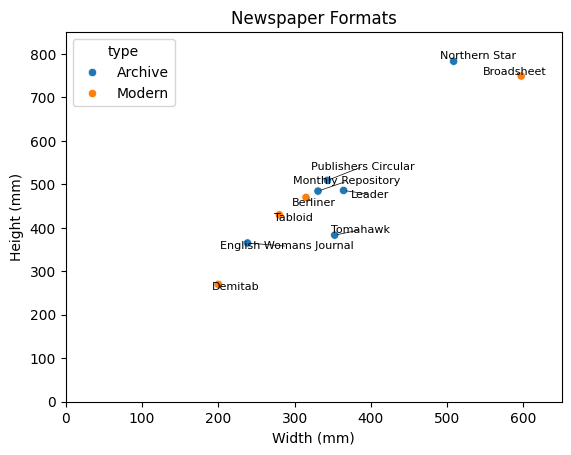

In [14]:
from adjustText import adjust_text

newspapers_in_mm = test.groupby('subfolder')[['page_width_pt', 'page_height_pt']].mean()*0.3527777778
newspapers_in_mm.reset_index(inplace = True)
newspapers_in_mm.columns = ['name','width', 'height']
newspapers_in_mm['name'] =  newspapers_in_mm['name'].str.replace("_issue_PDF_files", "").str.replace("_", " ")

newspapers_in_mm['type'] = 'Archive'

modern_newspaper_df = pd.DataFrame({'name':['Broadsheet', 'Berliner', 'Tabloid', 'Demitab'],
             'width':[597,315,280, 200],
             'height':[749,470, 430, 270]})

modern_newspaper_df['type'] = 'Modern'

sns.scatterplot(data = pd.concat([newspapers_in_mm,modern_newspaper_df]), x = 'width', y = 'height', hue = 'type')

# Create list to store all text objects
texts = []
all_newspapers = pd.concat([newspapers_in_mm, modern_newspaper_df])

# Create text objects for each point
for idx, row in all_newspapers.iterrows():
    texts.append(plt.text(row['width'], row['height'], row['name'], fontsize=8))

# Adjust text positions to avoid overlap
adjust_text(texts,
           arrowprops=dict(arrowstyle='-', color='black', lw=0.5),
           expand_points=(6, 6),
           force_text = 100)


plt.xlim([0,650])
plt.ylim([0, 850])
plt.title('Newspaper Formats')
plt.xlabel('Width (mm)')
plt.ylabel('Height (mm)')


newspapers_in_mm

In [44]:
test = pd.read_parquet('data/periodical_bboxes/raw/English_Womans_Journal_issue_PDF_files_1056.parquet')

In [2]:
import os
from lightning_sdk import Studio

studio = Studio(name="doclayout-yolo", teamspace="Language-model", user="ucabbou")

/home/jonno/ereading_the_unreadable/.venv/lib/python3.12/site-packages/lightning_sdk/helpers.py:43: UserWarning: A newer version of lightning-sdk is available (0.1.50). Please consider upgrading with `pip install -U lightning-sdk`. Not all functionalities of the platform can be guaranteed to work with the current version.
  warnings.warn(


In [4]:
studio.download_file('all_bounding_boxes/periodical_bboxes/Northern_Star_issue_PDF_files_2112.parquet')

# Creating example of a page

I want to send an example of page reconstruction to DLOC and get there thoughts on how useful it is 



In [3]:
import os
import re

# Create the output directory if it doesn't exist
output_dir = 'data/example_text_pages'
os.makedirs(output_dir, exist_ok=True)

# Sort the dataframe by issue_id, page_number, and reading_order
sorted_df = example_pages.sort_values(['issue_id', 'page_number', 'reading_order'])

def clean_text(text):
    # Function to clean and format text
    
    # Replace hyphenated line breaks with temporary marker
    text = re.sub(r'-\n', 'HYPHENBREAK', text)
    
    # Replace double line breaks with a marker
    text = re.sub(r'\n\n+', 'DOUBLEPAGEBREAK', text)
    
    # Remove single line breaks
    text = re.sub(r'\n', ' ', text)
    
    # Restore hyphenated words (removing the hyphen)
    text = text.replace('HYPHENBREAK', '')
    
    # Restore double line breaks
    text = text.replace('DOUBLEPAGEBREAK', '\n\n')
    
    # Clean up extra spaces
    text = re.sub(r' +', ' ', text)
    
    return text.strip()

# Group by issue_id and page_number, then concatenate and clean the content
reconstructed_text = (sorted_df.groupby(['issue_id', 'page_number'])['content']
                     .apply(lambda x: '\n\n'.join(x))  # Join sections with double line break
                     .apply(clean_text)
                     .reset_index())

# Save each page as a separate file
for _, row in reconstructed_text.iterrows():
    filename = f"issue_{row['issue_id']}_page_{row['page_number']}.txt"
    filepath = os.path.join(output_dir, filename)
    with open(filepath, 'w', encoding='utf-8') as f:
        f.write(row['content'])

In [17]:
from tenacity import retry, wait_fixed, stop_after_attempt, retry_if_exception_type
import json
@retry(
    wait=wait_fixed(0.2),  # Wait 0.2 seconds between attempts (5 requests per second)
    stop=stop_after_attempt(3),  # Maximum 3 attempts
    retry=retry_if_exception_type(Exception)
)
def classify_text_with_api(prompt, client, model="mistral-large-latest"):
    try:
        # Get API response
        chat_response = client.chat.complete(
            model=model,
            messages=[
                {
                    "role": "user",
                    "content": prompt
                }
            ],
        )

        content = chat_response.choices[0].message.content.strip()
        
        # Remove any markdown formatting
        content = content.lstrip('```json').rstrip('```').strip()
        
        def clean_response(text):
            # Replace single quotes with double quotes for JSON compatibility
            text = text.replace("'", '"')
            # Remove any whitespace or newlines
            text = ''.join(text.split())
            return text
        
        # Clean the response
        cleaned_content = clean_response(content)
        
        # Try multiple parsing methods
        try:
            # Method 1: Direct JSON parsing
            result_dict = json.loads(cleaned_content)
        except json.JSONDecodeError:
            try:
                # Method 2: Python literal eval
                import ast
                result_dict = ast.literal_eval(content)
            except:
                try:
                    # Method 3: Manual parsing for simple cases
                    if 'class' in content and ':' in content:
                        # Extract the class value
                        class_str = content.split(':')[1].strip().rstrip('}')
                        if class_str.startswith('[') and class_str.endswith(']'):
                            # Handle list of classes
                            class_values = [int(x.strip()) for x in class_str[1:-1].split(',') if x.strip()]
                            result_dict = {'class': class_values}
                        else:
                            # Handle single class
                            class_value = int(class_str)
                            result_dict = {'class': class_value}
                    else:
                        print(f"Unable to parse response format: {content}")
                        return {'class': 99}
                except:
                    print(f"Failed to parse response: {content}")
                    return {'class': 99}

        # Validate the result
        if not isinstance(result_dict, dict) or 'class' not in result_dict:
            print(f"Invalid result format: {result_dict}")
            return {'class': 99}

        return result_dict

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        try:
            print(f"Response content: {content}")
        except:
            print("Could not print response content")
        return {'class': 99}

In [22]:
from helper_functions_class import create_genre_prompt, create_iptc_prompt, classify_text_with_api

import pandas as pd
from tqdm import tqdm  # for progress bar
import time

from mistralai import Mistral

api_key = os.environ["MISTRAL_API_KEY"]
client = Mistral(api_key=api_key)

def process_dataframe(df, client):
    """
    Process the DataFrame and add classification columns with descriptive names.
    
    Args:
        df (pandas.DataFrame): Input DataFrame with 'content' column
        client: The API client for text classification
    
    Returns:
        pandas.DataFrame: DataFrame with added classification columns using descriptive names
    """
    # Define mapping dictionaries
    topic_mapping = {
        0: 'arts_culture_entertainment_media',
        1: 'crime_law_justice',
        2: 'disaster_accident_emergency',
        3: 'economy_business_finance',
        4: 'education',
        5: 'environment',
        6: 'health',
        7: 'human_interest',
        8: 'labour',
        9: 'lifestyle_leisure',
        10: 'politics',
        11: 'religion',
        12: 'science_technology',
        13: 'society',
        14: 'sport',
        15: 'conflict_war_peace',
        16: 'weather',
        17: 'NA'
    }

    article_class_mapping = {
        0: 'news_report',
        1: 'editorial',
        2: 'letter',
        3: 'advert',
        4: 'review',
        5: 'poem_song_story',
        6: 'other',
        99: 'error'  # For error cases
    }
    
    # Create lists to store the results
    genre_results = []
    topic_results = []
    
    # Process each row
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing articles"):
        try:
            # Generate prompts
            genre_prompt = create_genre_prompt(row['content'])
            iptc_prompt = create_iptc_prompt(row['content'])
            
            # Get classifications
            genre_result = classify_text_with_api(genre_prompt, client)
            time.sleep(0.6)
            topic_result = classify_text_with_api(iptc_prompt, client)
            time.sleep(0.6)
            # Store results
            genre_results.append(genre_result.get('class', 99))
            topic_results.append(topic_result.get('class', [17]))
            
        except Exception as e:
            print(f"Error processing row {index}: {str(e)}")
            genre_results.append(99)
            topic_results.append([17])
    
    # Add results to DataFrame
    df['topic_classes'] = topic_results
    
    # Add article class with descriptive name
    df['article_type'] = [article_class_mapping[class_id] for class_id in genre_results]
    
    # Create binary columns for each topic with descriptive names
    for topic_id, topic_name in topic_mapping.items():
        column_name = f'topic_{topic_name}'
        df[column_name] = df['topic_classes'].apply(lambda x: 1 if topic_id in x else 0)

    
    return df


In [32]:
def classify_text_with_api2(prompt, client, model="mistral-large-latest"):

    chat_response = client.chat.complete(
        model=model,
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ],
    )

    content = chat_response.choices[0].message.content

    return content

In [23]:

row = example_pages.loc[0]

genre_prompt = create_genre_prompt(row['content'])
iptc_prompt = create_iptc_prompt(row['content'])

# Get classifications
genre_result = classify_text_with_api(genre_prompt, client)
topic_result = classify_text_with_api(iptc_prompt, client)

In [24]:
df = process_dataframe(example_pages, client)
df.to_csv('data/classified_testset_raw.csv')

Processing articles: 100%|██████████| 375/375 [23:06<00:00,  3.70s/it] 


In [25]:
df.groupby(['article_type']).size()

article_type
advert             75
editorial          43
letter             93
news_report        80
other              32
poem_song_story    26
review             26
dtype: int64

In [11]:
df.groupby(['topic_classes']).size()

TypeError: unhashable type: 'list'

# Getting pages per periodical

This is just for the table in the paper

In [15]:
from function_modules.send_to_lm_functions import split_image
from PIL import Image

# Load the image

image_path = 'data/converted/ncse_cropped_images/CLD_1853-07-30_page_2_B0C2R7.png'
img = Image.open(image_path)

image_list = split_image(img, max_ratio=1, overlap_fraction=0.2, max_segments=20)

save_folder = 'data/images_for_paper'

os.makedirs(save_folder, exist_ok=True)

for i, img in enumerate(image_list):
    img.save(os.path.join(save_folder,f'CLD_1853-07-30_page_2_B0C2R7_{i}.jpg'))  # Saves as image_0.jpg, image_1.jpg, etc.

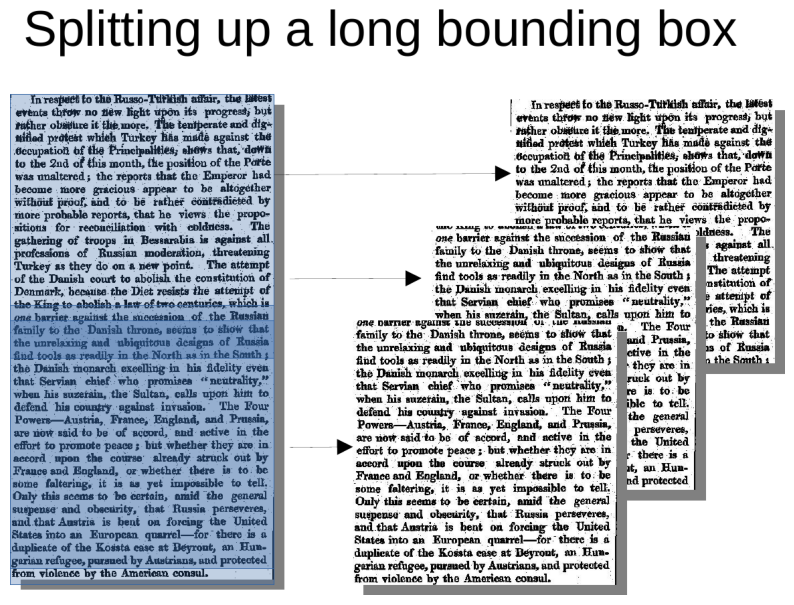

In [11]:
from pdf2image import convert_from_path
from PIL import ImageOps

# Convert PDF to images
image = convert_from_path('data/splitting_bounding.pdf')[0]

# Get bounding box of non-white pixels
bbox = ImageOps.invert(image).getbbox()

# Crop image to bounding box
cropped_image = image.crop(bbox)

# Display
plt.figure(figsize=(10, 10))
plt.imshow(cropped_image)
plt.axis('off')
plt.show()


cropped_image.save(os.path.join(save_figs,'splitting_bounding.png'))


In [28]:
from wand.image import Image
from PIL import Image as PILImage
def deskew_image(input_path, output_path=None):
    try:
        # Load the image
        with Image(filename=input_path) as img:
            # Get the deskew angle
            angle = img.deskew(0.4 * img.quantum_range)  # 0.4 is the threshold (default)
            
            # Perform the deskew operation
            img.rotate(angle)
            
            # Save the deskewed image if output path is provided
            if output_path:
                img.save(filename=output_path)
                print(f"Deskewed image saved to: {output_path}")
            
            print(f"Deskew angle: {angle} degrees")
            return img
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Path to your image
input_image_path = "data/images_for_paper/NSS_1852-10-02_page_14_B0C3R18.png"
#input_image_path = "data/converted/ncse_cropped_images/NSS_1852-10-02_page_14_B0C1R1.png"
output_image_path = "deskewed_output.png"  # Optional: path where to save the deskewed image

# Perform deskewing
deskewed_image = deskew_image(input_image_path, output_image_path)

Deskewed image saved to: deskewed_output.png
Deskew angle: True degrees


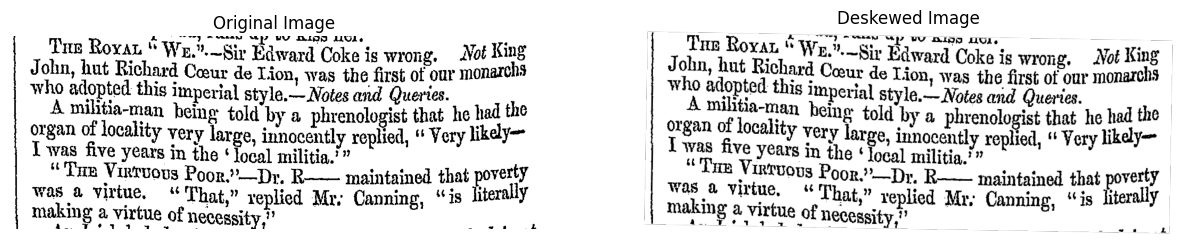

In [29]:
def display_images(original_path, deskewed_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Display original image
    original = PILImage.open(original_path)
    ax1.imshow(original)
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    # Display deskewed image
    deskewed = PILImage.open(deskewed_path)
    ax2.imshow(deskewed)
    ax2.set_title('Deskewed Image')
    ax2.axis('off')
    
    plt.show()

# After deskewing, display the results
display_images(input_image_path, output_image_path)

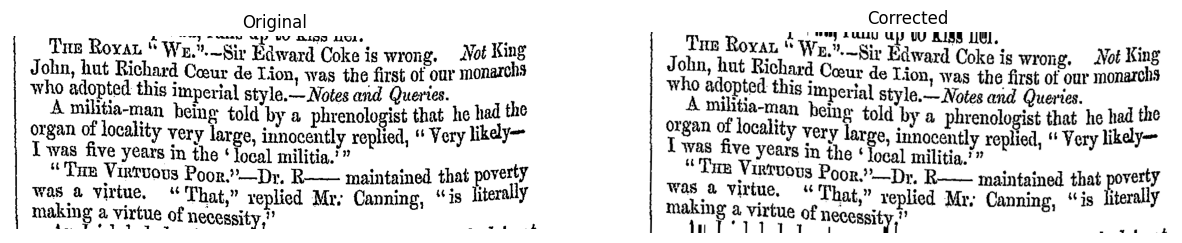

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def correct_skew_hough(image_path, output_path=None):
    """
    Automatically corrects image skew using Hough transform.
    Can be cited as using OpenCV's implementation of the Hough transform.
    """
    # Read image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Binarize image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Detect edges
    edges = cv2.Canny(binary, 50, 200, apertureSize=3)
    
    # Use Hough transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)
    
    if lines is not None:
        # Calculate angles
        angles = []
        for line in lines:
            rho, theta = line[0]
            # Convert theta to degrees and adjust
            angle = (theta * 180 / np.pi) - 90
            # Only consider angles between -45 and 45 degrees
            if -45 < angle < 45:
                angles.append(angle)
        
        if angles:
            # Use median angle for robustness
            skew_angle = np.median(angles)
            
            # Rotate image
            (h, w) = img.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, skew_angle, 1.0)
            
            # Calculate new image size to prevent cropping
            cos = np.abs(M[0, 0])
            sin = np.abs(M[0, 1])
            new_w = int((h * sin) + (w * cos))
            new_h = int((h * cos) + (w * sin))
            
            # Adjust translation
            M[0, 2] += (new_w / 2) - center[0]
            M[1, 2] += (new_h / 2) - center[1]
            
            # Perform rotation
            rotated = cv2.warpAffine(img, M, (new_w, new_h), 
                                   flags=cv2.INTER_CUBIC,
                                   borderMode=cv2.BORDER_REPLICATE)
        else:
            print("No valid angles found")
            rotated = img
    else:
        print("No lines detected")
        rotated = img
    
    if output_path:
        cv2.imwrite(output_path, rotated)
    
    return rotated

# Function to display results
def show_results(original, corrected):
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB))
    plt.title('Corrected')
    plt.axis('off')
    plt.show()

# Usage
image_path = "data/images_for_paper/NSS_1852-10-02_page_14_B0C3R18.png"
image_path = "data/converted/ncse_cropped_images/NSS_1852-10-02_page_14_B0C1R1.png"
image_path = "data/images_for_paper/NSS_1852-10-02_page_14_B0C3R18.png"
output_path = "corrected_hough.png"

# Read original image for comparison
original = cv2.imread(image_path)
# Apply correction
corrected = correct_skew_hough(image_path, output_path)
# Show results
show_results(original, corrected)

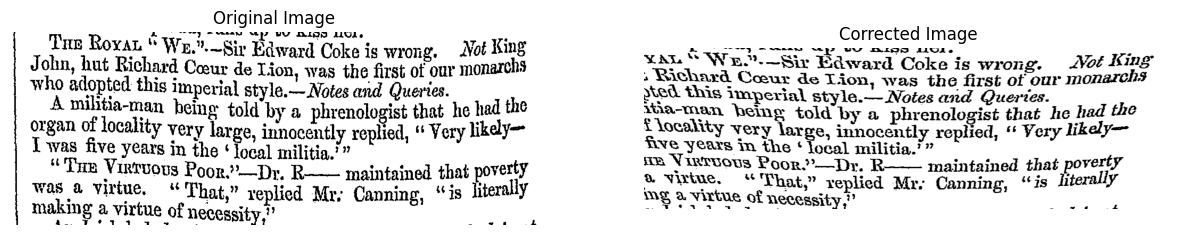

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def correct_distortion_pil(image_path, output_path=None, correction_factor=0.1):
    """
    Corrects image distortion using PIL's transform function.
    correction_factor: controls the amount of correction (try values between 0.05 and 0.2)
    """
    # Open image
    img = Image.open(image_path)
    width, height = img.size
    
    # Add padding to prevent content loss
    padding = int(width * correction_factor)
    new_width = width + 2*padding
    
    # Source coordinates (original image)
    src_coords = [
        padding, 0,           # top left
        padding, height,      # bottom left
        padding + width, height,  # bottom right
        padding + width, 0        # top right
    ]
    
    # Destination coordinates (where pixels should move to)
    # Adding a curve correction
    curve = int(width * correction_factor)
    dst_coords = [
        padding + curve, 0,              # top left (moved right)
        padding, height,                 # bottom left
        padding + width, height,         # bottom right
        padding + width - curve, 0       # top right (moved left)
    ]
    
    # Create new image with padding
    corrected = img.transform(
        (new_width, height),
        Image.QUAD,
        dst_coords + src_coords,
        Image.Resampling.BICUBIC,
        fillcolor=(255, 255, 255)  # white background
    )
    
    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(corrected)
    ax2.set_title('Corrected Image')
    ax2.axis('off')
    plt.show()
    
    if output_path:
        corrected.save(output_path)
    
    return corrected

# Usage
image_path = "data/images_for_paper/NSS_1852-10-02_page_14_B0C3R18.png"
# Try different correction factors
corrected_pil = correct_distortion_pil(image_path, 
                                     "corrected_pil.png", 
                                     correction_factor=0.1)  # Using a smaller correction factor

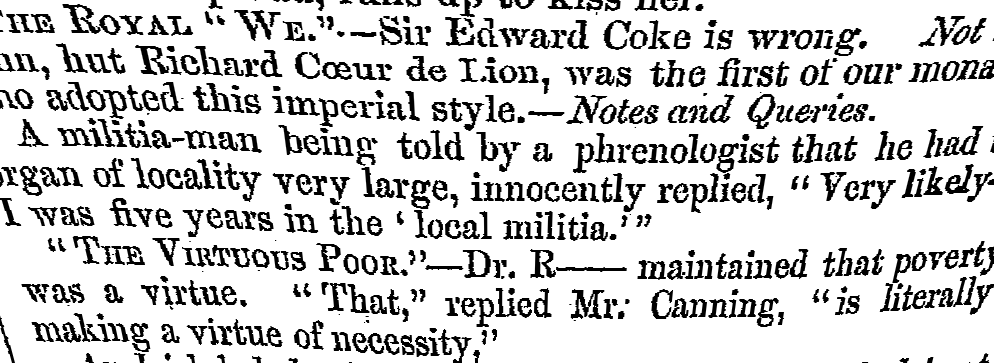

In [44]:
corrected_pil